In [ ]:
!pip install igraph

3 [[0, 5, 1, 24, 8, 10, 20, 53, 14, 22, 18, 7, 16, 25, 11, 70, 28, 13, 57, 2, 42, 21, 71, 80, 74, 26, 46, 15, 29, 44, 51, 93, 38, 12, 81, 79, 52, 19, 68, 47, 40, 50, 6, 76, 23, 27, 95, 56, 49, 59, 84, 17, 58, 9, 94, 65, 37, 72, 3, 32, 36, 66, 33, 39, 67, 63, 31, 30, 4, 45, 48, 91, 34, 60, 55, 69, 75, 73, 87, 77, 61, 99, 78, 92, 35, 62, 97, 54, 64, 96, 85, 86, 83, 98, 88, 89, 90, 43], [41], [82]]
Clustering with 100 elements and 3 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
    39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
    58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
    76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
    95, 96, 97, 98, 99
[1] 41
[2] 82
True
True
0 : [5, 58, 62, 75, 87, 89]
1 : [5, 24, 95, 96]
2 : [42, 44, 57, 61, 74, 88, 93]
3 : [32, 72, 97]
4 : [30, 45]
[[0, 0, 0, 0, 0, 

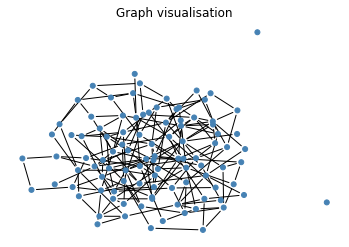

In [54]:
from numpy import random
from matplotlib import pyplot as plt
from igraph import *
from google.colab import files


def breadth_first(g, x, y):
	bfs = g.bfs(x)[0]
	if x not in bfs or y not in bfs:
		print("X and Y vertices are not connected")
	else:
		i = bfs.index(y)
		bfs = bfs[:i + 1]
		length = len(bfs)
		adj_list = g.get_adjlist()
		bfs_copy = bfs
		i = 0
		while True:
			init_point = bfs_copy[i]
			if init_point == bfs_copy[-1]:
				break
			else:
				temp = adj_list[init_point]
				k = 0
				for e in reversed(bfs_copy[bfs_copy.index(init_point) + 1:]):
					if e in temp:
						k = bfs_copy.index(e)
						break
				if k:
					bfs_copy = bfs_copy[:i + 1] + bfs_copy[k:]
					# print(bfs_copy, bfs_copy[i])
				i += 1

		print("BFS path:")
		print(bfs_copy)
		print("Minimal distance from " + str(x) + " to " + str(y) + ": " + str(len(bfs_copy) - 1))


n = 100
m = 200

g = Graph.Erdos_Renyi(n=n, m=m) #graph generating

#connected components algorithm 

visited = [False for i in range(n+1)]
all_components = []
graph = g.get_adjlist()
def dfs(node, component):
    # marking node as visited.
    visited[node] = True

    # appending node in the component list
    component.append(node)
    # visiting neighbours of the current node
    for neighbour in graph[node]:
        # if the node is not visited then we call dfs on that node.
        if visited[neighbour] == False:
            dfs(neighbour, component)


for i in range(n):
    if visited[i] == False:
        component = []
        dfs(i, component)
        all_components.append(component)

print(len(all_components), all_components)
print(g.components())
print(set(all_components[0]) == set(g.components()[0]))
print(set(all_components[1]) == set(g.components()[1]))

for i in range(5): #getting first five elements of adjacency list
	print(i, ':', g.get_adjlist()[i])
print(g.get_adjacency()[:5]) #ajacency matrix

#search results
breadth_first(g, 0, 99)

fig, ax = plt.subplots()
plot(g, layout=g.layout("kamada_kawai"), bbox=(300, 300), margin=20, target=ax)
plt.axis('off')
plt.title('Graph visualisation')
plt.savefig('1.png')
plt.show()

In [55]:
files.download("1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>